In [2]:
print(fes_data.shape)


(576, 5)


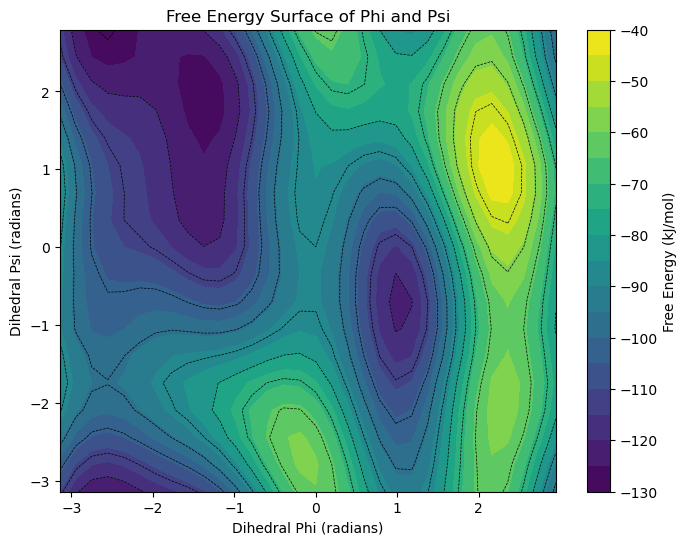

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load the free energy data
fes_data = np.loadtxt('fes.dat')

# Extract phi, psi, and free energy values
phi = fes_data[:, 0]
psi = fes_data[:, 1]
free_energy = fes_data[:, 2]

# Find unique values for phi and psi to determine grid size
phi_unique = np.unique(phi)
psi_unique = np.unique(psi)

# Get the grid dimensions
n_phi = len(phi_unique)
n_psi = len(psi_unique)

# Reshape free energy into a 2D grid for plotting
free_energy_grid = free_energy.reshape((n_psi, n_phi))

# Create a meshgrid for plotting
phi_grid, psi_grid = np.meshgrid(phi_unique, psi_unique)

# Plot the free energy surface using imshow
plt.figure(figsize=(8, 6))
contour = plt.contourf(phi_grid, psi_grid, free_energy_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Free Energy (kJ/mol)')
plt.contour(phi_grid, psi_grid, free_energy_grid, levels=10, colors='black', linewidths=0.5)
plt.xlabel('Dihedral Phi (radians)')
plt.ylabel('Dihedral Psi (radians)')
plt.title('Free Energy Surface of Phi and Psi')
plt.show()

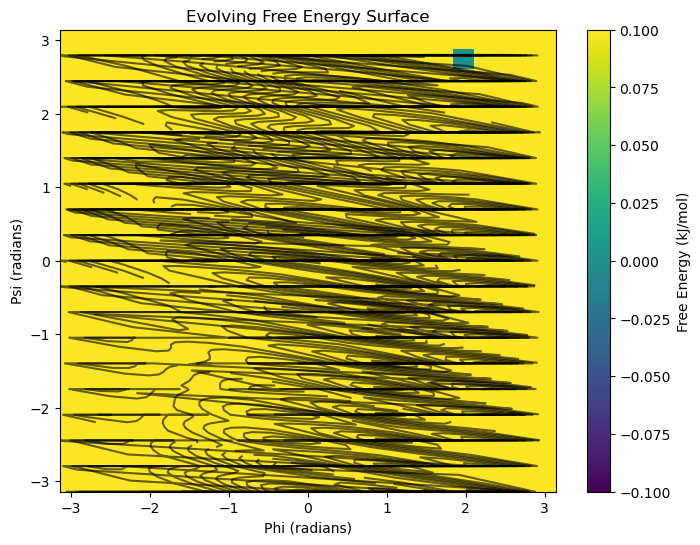

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib.animation import FuncAnimation

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.zeros((100, 100)), extent=[-np.pi, np.pi, -np.pi, np.pi],
               origin='lower', aspect='auto', cmap='viridis')
contour = None
plt.colorbar(im, label='Free Energy (kJ/mol)')
ax.set_xlabel('Phi (radians)')
ax.set_ylabel('Psi (radians)')
ax.set_title('Evolving Free Energy Surface')

# Load all the FES files generated with --stride
files = sorted(glob.glob('fes*.dat'))

def update(frame):
    global contour
    # Clear previous contour
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    data = np.loadtxt(files[frame])
    phi = data[:, 0].reshape((24, 24))
    psi = data[:, 1].reshape((24, 24))
    free_energy = data[:, 2].reshape((24, 24))
    
    im.set_array(free_energy)
    contour = ax.contour(phi, psi, free_energy, levels=20, colors='black', alpha=0.6)
    return [im] + contour.collections

# Create the animation
ani = FuncAnimation(fig, update, frames=len(files), blit=True, repeat=True)

# Save as GIF
ani.save('fes_animation.gif', writer='pillow', fps=5)
